In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")

feature_cols = [col for col in df.columns if col not in ['id', 'date', 'class4','partlybad']]
df_x = df[feature_cols]

df_x.shape

(450, 100)

In [3]:
#print(df_x.describe())
df_zero_rows = df_x[(df_x == 0).any(axis=1)]
print(df_zero_rows.shape[0])
print(df_x.columns[62])
print(df_x.columns[63])
print(df_x.columns[83])

44
PTG.mean
PTG.std
SWS.std


44 rows have value 0, in which 43 rows has  (PTG.mean, PTG.std) = (0,0), the rest one row has SWS.std = 0.

SWS.std = 0 is not meaningless， indicating SWS only have 1 or identical measurements.

In data impuation, (PTG.mean, PTG.std) can be imputed as the mean value of the whole distribution since they are approximatly chi-squared distribution.

In [4]:
# replace 0 with NA for EDA

df_x.loc[:, 'PTG.mean'] = df_x['PTG.mean'].replace(0, np.nan)
df_x.loc[:, 'PTG.std']  = df_x['PTG.std'].replace(0, np.nan)

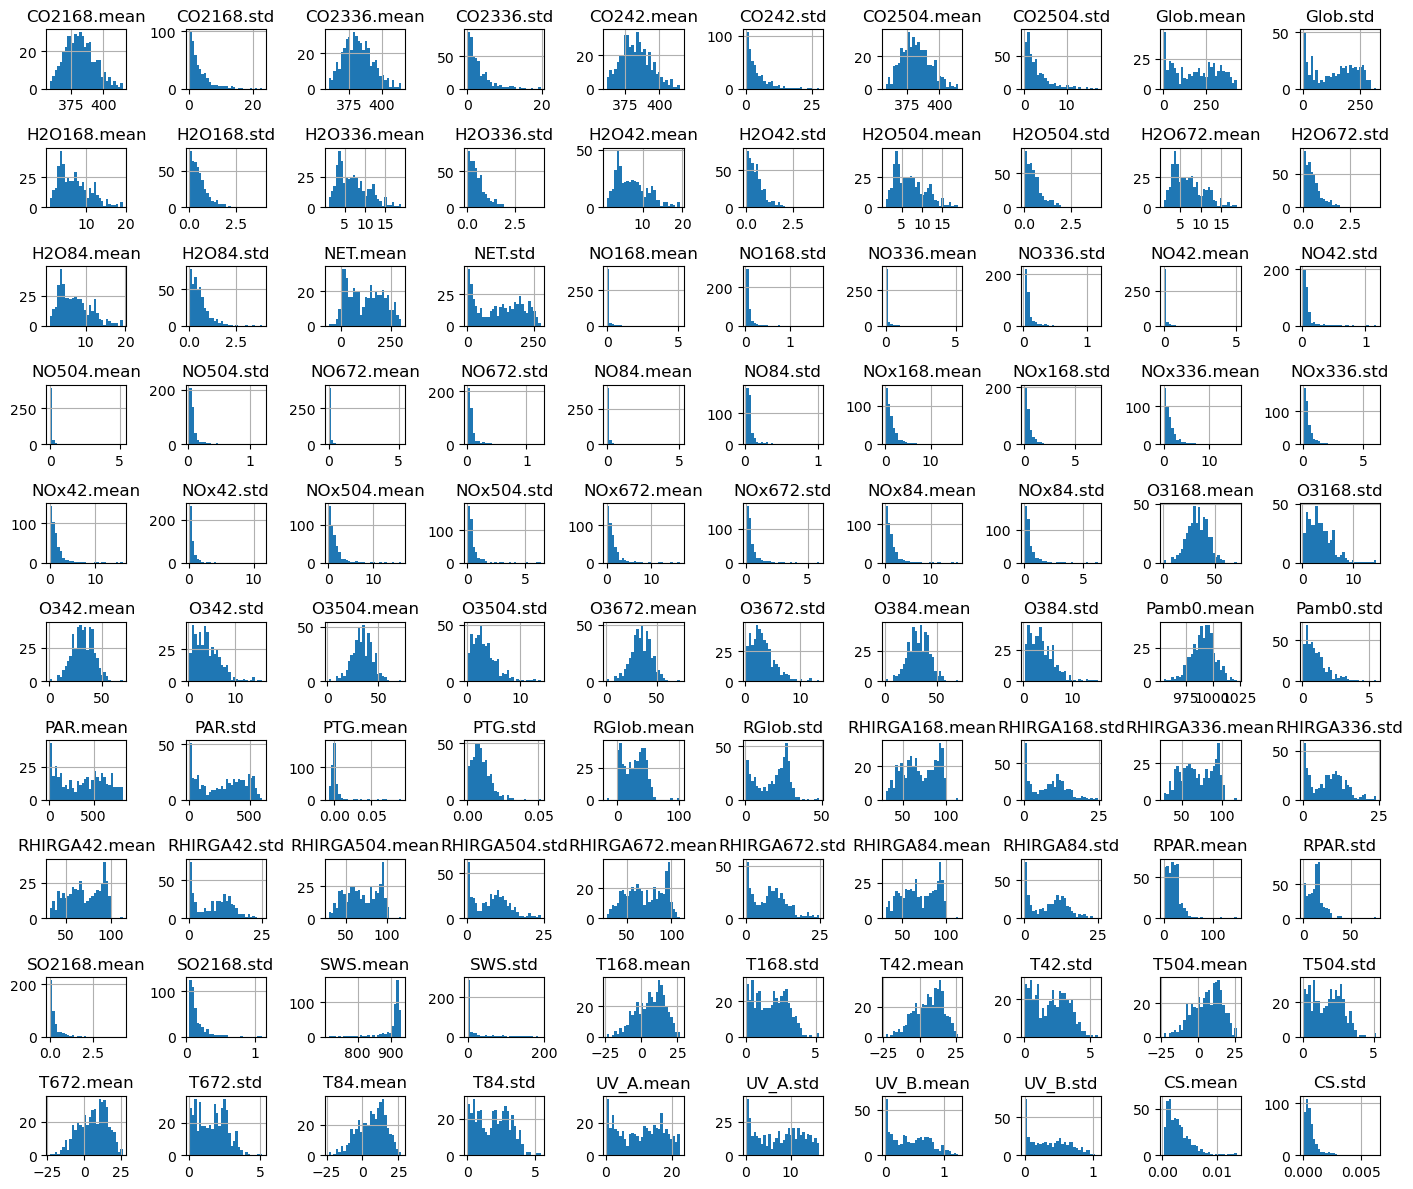

In [5]:
df_x.hist(figsize=(14, 12), bins=30)
plt.tight_layout()
plt.show()

In [6]:
#mean_cols = [c for c in df_x.columns if c.endswith(".mean")]
#mean_cols
#.mean, .std

start = ['CO2','Glob','H20','NET','NO','NOx','O3','Pamb0','PAR','PTG','RGlob','RHIRGA','RPAR','SO2','SWS','T','UV_A','UV_B','CS']


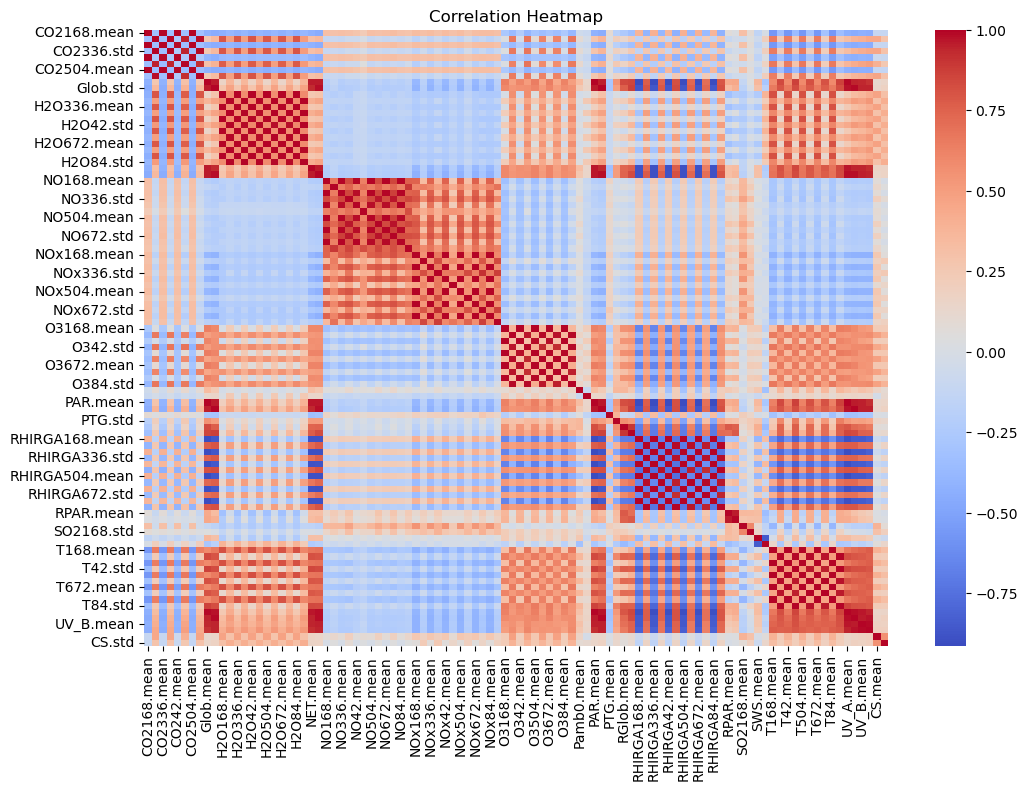

In [7]:
corr = df_x.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

CO2 4 heights; 
H20 6 heights; 
NO 6 heights; 
NOx 6 heights; 
O3 5 ehights; 
RHIRGA 6 heights; 
T 5 heights

Others, unique feature

Study those feastures of same physical meaning but different heights separately. 

             CO2168.mean  CO2336.mean  CO242.mean  CO2504.mean
CO2168.mean     1.000000     0.999675    0.993428     0.998567
CO2336.mean     0.999675     1.000000    0.992175     0.999533
CO242.mean      0.993428     0.992175    1.000000     0.989651
CO2504.mean     0.998567     0.999533    0.989651     1.000000
            CO2168.std  CO2336.std  CO242.std  CO2504.std
CO2168.std    1.000000    0.995668   0.951021    0.982864
CO2336.std    0.995668    1.000000   0.940796    0.990704
CO242.std     0.951021    0.940796   1.000000    0.920152
CO2504.std    0.982864    0.990704   0.920152    1.000000


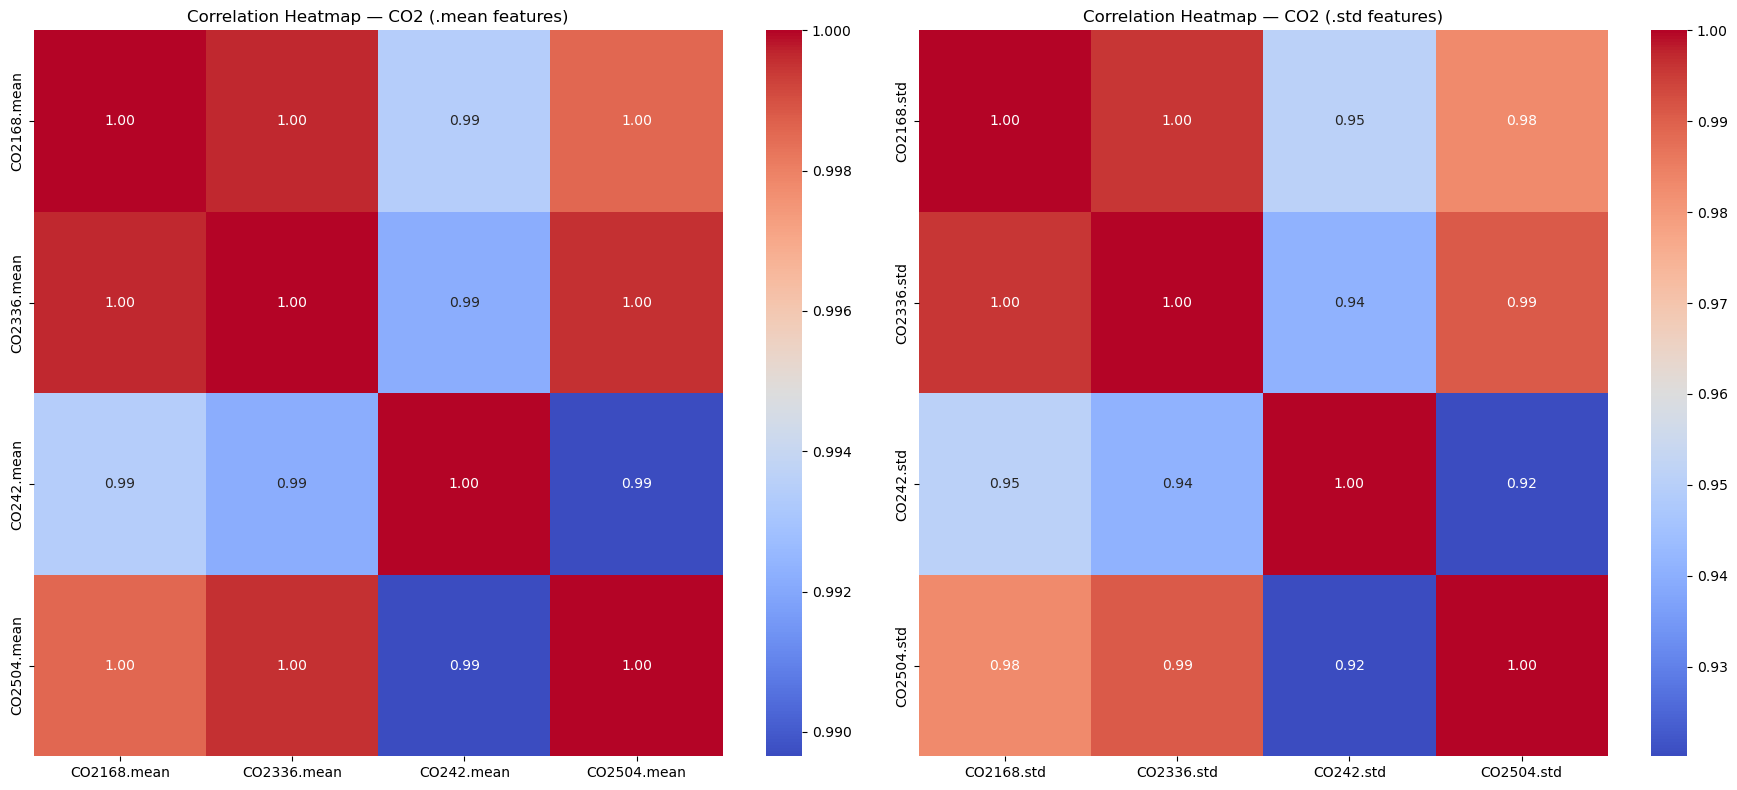

Mean correlation for each variable
CO2168.mean    0.997917
CO2336.mean    0.997846
CO2504.mean    0.996938
CO242.mean     0.993813
dtype: float64


In [ ]:
co2_cols = [c for c in df_x.columns if c.startswith("CO2")]
co2_mean_cols = [c for c in co2_cols if c.endswith(".mean")]
co2_std_cols = [c for c in co2_cols if c.endswith(".std")]

corr_mean = df_x[co2_mean_cols].corr()
corr_std = df_x[co2_std_cols].corr()

print(corr_mean)
print(corr_std)

mean_corr_order = corr_mean.mean().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))  #1 row, 2 columns

# --- Left plot: CO2 mean ---
sns.heatmap(corr_mean, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0])
axes[0].set_title("Correlation Heatmap — CO2 (.mean features)")

# --- Right plot: CO2 std ---
sns.heatmap(corr_std, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1])
axes[1].set_title("Correlation Heatmap — CO2 (.std features)")

plt.tight_layout()
plt.show()

print('Mean correlation for each variable')
print(mean_corr_order)


             H2O168.mean  H2O336.mean  H2O42.mean  H2O504.mean  H2O672.mean  \
H2O168.mean     1.000000     0.999883    0.999604     0.999704     0.999495   
H2O336.mean     0.999883     1.000000    0.999138     0.999937     0.999789   
H2O42.mean      0.999604     0.999138    1.000000     0.998759     0.998440   
H2O504.mean     0.999704     0.999937    0.998759     1.000000     0.999901   
H2O672.mean     0.999495     0.999789    0.998440     0.999901     1.000000   
H2O84.mean      0.999819     0.999468    0.999923     0.999156     0.998878   

             H2O84.mean  
H2O168.mean    0.999819  
H2O336.mean    0.999468  
H2O42.mean     0.999923  
H2O504.mean    0.999156  
H2O672.mean    0.998878  
H2O84.mean     1.000000  
            H2O168.std  H2O336.std  H2O42.std  H2O504.std  H2O672.std  \
H2O168.std    1.000000    0.998450   0.992950    0.996167    0.992650   
H2O336.std    0.998450    1.000000   0.988221    0.998831    0.996125   
H2O42.std     0.992950    0.988221   1.000000

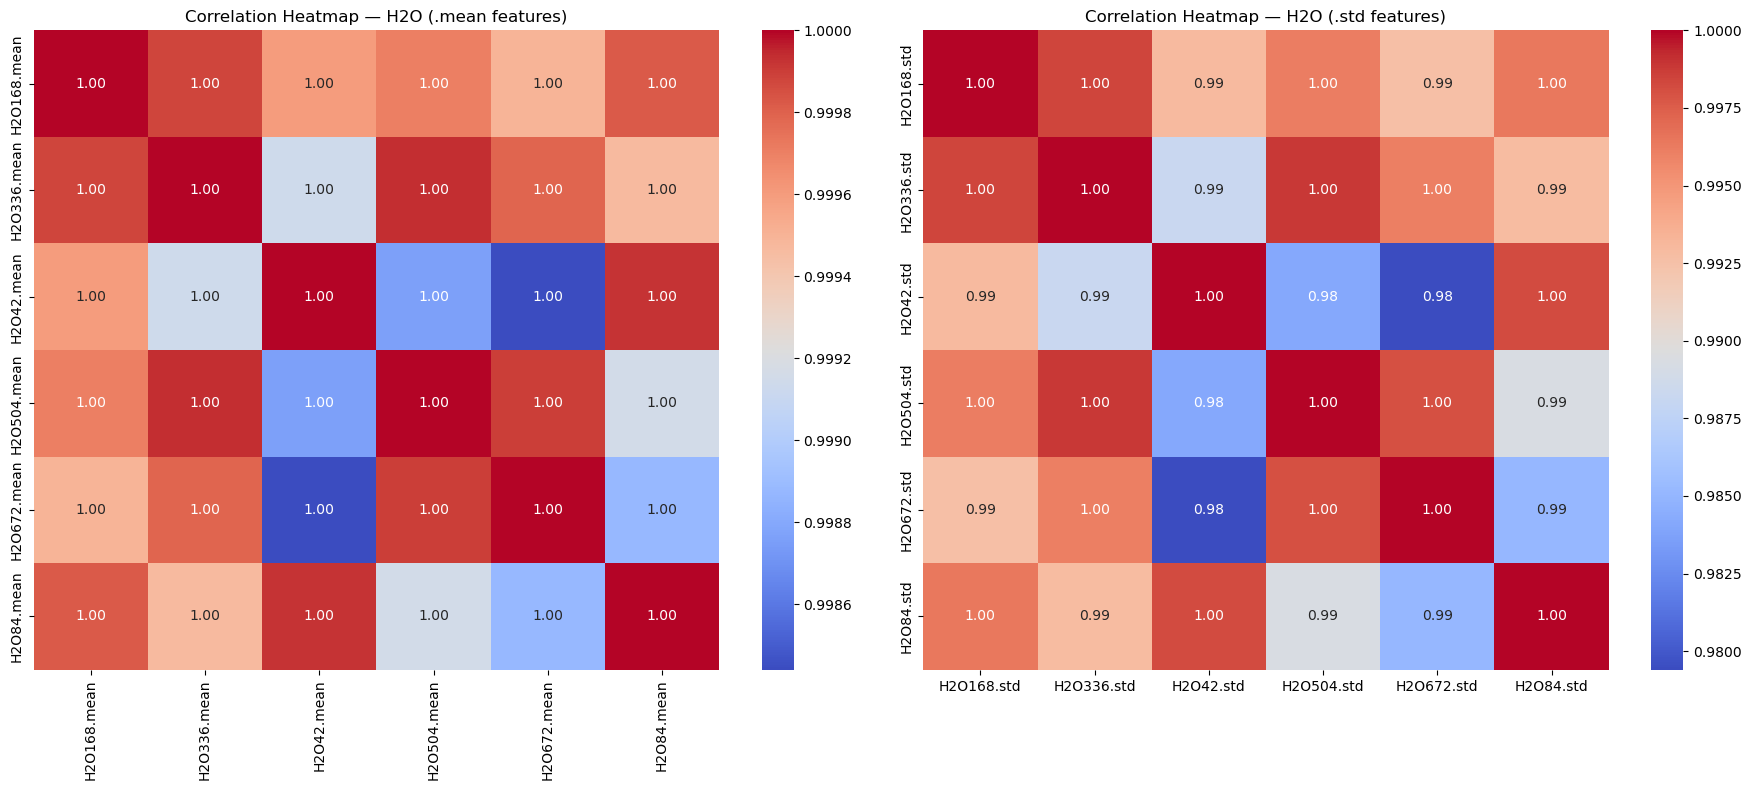

Mean correlation for each variable
H2O168.mean    0.999751
H2O336.mean    0.999703
H2O504.mean    0.999576
H2O84.mean     0.999541
H2O672.mean    0.999417
H2O42.mean     0.999311
dtype: float64


In [9]:
h2o_cols = [c for c in df_x.columns if c.startswith("H2O")]
h2o_mean_cols = [c for c in h2o_cols if c.endswith(".mean")]
h2o_std_cols = [c for c in h2o_cols if c.endswith(".std")]

corr_mean = df_x[h2o_mean_cols].corr()
corr_std = df_x[h2o_std_cols].corr()

print(corr_mean)
print(corr_std)

mean_corr_order = corr_mean.mean().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # 1 row, 2 columns

# --- Left plot: H20 mean ---
sns.heatmap(corr_mean, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0])
axes[0].set_title("Correlation Heatmap — H2O (.mean features)")

# --- Right plot: H20 std ---
sns.heatmap(corr_std, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1])
axes[1].set_title("Correlation Heatmap — H2O (.std features)")

plt.tight_layout()
plt.show()

print('Mean correlation for each variable')
print(mean_corr_order)

             NO168.mean  NO336.mean  NO42.mean  NO504.mean  NO672.mean  \
NO168.mean     1.000000    0.998448   0.987552    0.997619    0.996109   
NO336.mean     0.998448    1.000000   0.983518    0.999361    0.998184   
NO42.mean      0.987552    0.983518   1.000000    0.983496    0.983028   
NO504.mean     0.997619    0.999361   0.983496    1.000000    0.999286   
NO672.mean     0.996109    0.998184   0.983028    0.999286    1.000000   
NO84.mean      0.995969    0.993177   0.995661    0.992426    0.991274   
NOx168.mean    0.751701    0.762704   0.687326    0.762825    0.760559   
NOx336.mean    0.751969    0.764071   0.688589    0.764625    0.762819   
NOx42.mean     0.748947    0.760149   0.685925    0.760079    0.757534   
NOx504.mean    0.754311    0.766828   0.692422    0.768283    0.767217   
NOx672.mean    0.754007    0.766705   0.693341    0.768928    0.768885   
NOx84.mean     0.751297    0.762379   0.686605    0.762307    0.759833   

             NO84.mean  NOx168.mean  

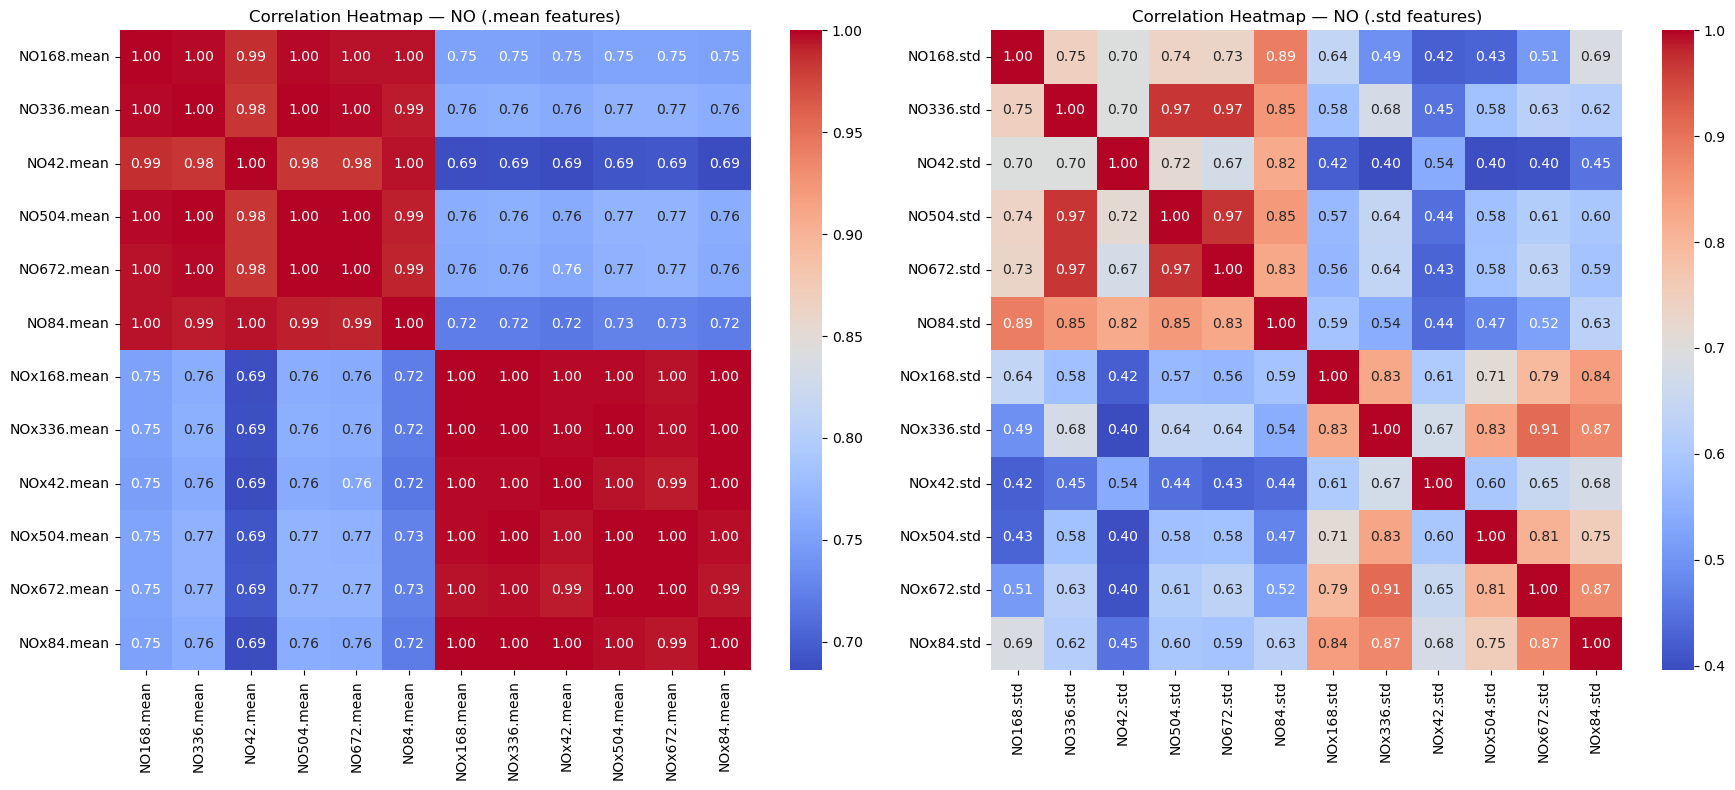

Mean correlation for each variable
NO504.mean     0.879936
NO336.mean     0.879627
NO672.mean     0.878727
NO168.mean     0.873994
NOx504.mean    0.872002
NOx672.mean    0.871400
NOx336.mean    0.870610
NOx168.mean    0.869779
NOx84.mean     0.869423
NOx42.mean     0.868052
NO84.mean      0.858630
NO42.mean      0.838955
dtype: float64


In [10]:
no_cols = [c for c in df_x.columns if c.startswith("NO")]
no_mean_cols = [c for c in no_cols if c.endswith(".mean")]
no_std_cols = [c for c in no_cols if c.endswith(".std")]

corr_mean = df_x[no_mean_cols].corr()
corr_std = df_x[no_std_cols].corr()

print(corr_mean)
print(corr_std)

mean_corr_order = corr_mean.mean().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # 1 row, 2 columns

# --- Left plot: NO mean ---
sns.heatmap(corr_mean, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0])
axes[0].set_title("Correlation Heatmap — NO (.mean features)")

# --- Right plot: NO std ---
sns.heatmap(corr_std, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1])
axes[1].set_title("Correlation Heatmap — NO (.std features)")

plt.tight_layout()
plt.show()

print('Mean correlation for each variable')
print(mean_corr_order)

             NOx168.mean  NOx336.mean  NOx42.mean  NOx504.mean  NOx672.mean  \
NOx168.mean     1.000000     0.999269    0.998643     0.997820     0.995218   
NOx336.mean     0.999269     1.000000    0.997965     0.999169     0.997259   
NOx42.mean      0.998643     0.997965    1.000000     0.996275     0.993348   
NOx504.mean     0.997820     0.999169    0.996275     1.000000     0.998906   
NOx672.mean     0.995218     0.997259    0.993348     0.998906     1.000000   
NOx84.mean      0.999691     0.999049    0.998966     0.997361     0.994538   

             NOx84.mean  
NOx168.mean    0.999691  
NOx336.mean    0.999049  
NOx42.mean     0.998966  
NOx504.mean    0.997361  
NOx672.mean    0.994538  
NOx84.mean     1.000000  
            NOx168.std  NOx336.std  NOx42.std  NOx504.std  NOx672.std  \
NOx168.std    1.000000    0.825795   0.605630    0.711740    0.793954   
NOx336.std    0.825795    1.000000   0.672157    0.830585    0.912257   
NOx42.std     0.605630    0.672157   1.000000

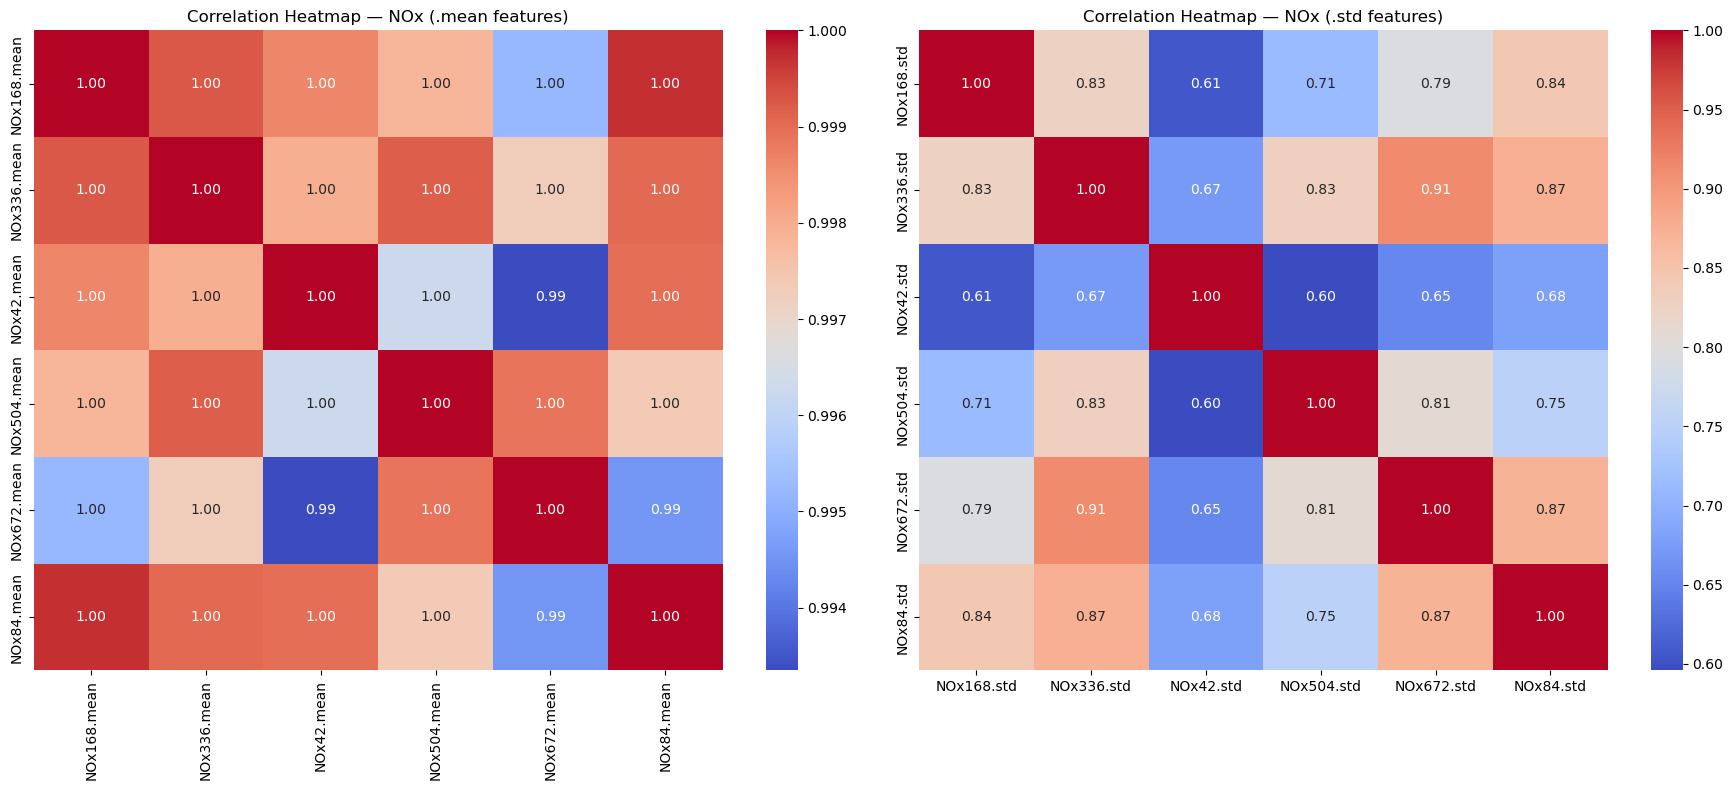

Mean correlation for each variable
NOx336.mean    0.998785
NOx168.mean    0.998440
NOx84.mean     0.998267
NOx504.mean    0.998255
NOx42.mean     0.997533
NOx672.mean    0.996545
dtype: float64


In [11]:
nox_cols = [c for c in df_x.columns if c.startswith("NOx")]
nox_mean_cols = [c for c in nox_cols if c.endswith(".mean")]
nox_std_cols = [c for c in nox_cols if c.endswith(".std")]

corr_mean = df_x[nox_mean_cols].corr()
corr_std = df_x[nox_std_cols].corr()

print(corr_mean)
print(corr_std)

mean_corr_order = corr_mean.mean().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # 1 row, 2 columns

# --- Left plot: NOx mean ---
sns.heatmap(corr_mean, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0])
axes[0].set_title("Correlation Heatmap — NOx (.mean features)")

# --- Right plot: NO std ---
sns.heatmap(corr_std, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1])
axes[1].set_title("Correlation Heatmap — NOx (.std features)")

plt.tight_layout()
plt.show()

print('Mean correlation for each variable')
print(mean_corr_order)

            O3168.mean  O342.mean  O3504.mean  O3672.mean  O384.mean
O3168.mean    1.000000   0.995122    0.995799    0.993132   0.998327
O342.mean     0.995122   1.000000    0.984061    0.979908   0.998875
O3504.mean    0.995799   0.984061    1.000000    0.999324   0.990160
O3672.mean    0.993132   0.979908    0.999324    1.000000   0.986472
O384.mean     0.998327   0.998875    0.990160    0.986472   1.000000
           O3168.std  O342.std  O3504.std  O3672.std  O384.std
O3168.std   1.000000  0.966762   0.985301   0.971438  0.991071
O342.std    0.966762  1.000000   0.935189   0.918349  0.985991
O3504.std   0.985301  0.935189   1.000000   0.995136  0.967054
O3672.std   0.971438  0.918349   0.995136   1.000000  0.951604
O384.std    0.991071  0.985991   0.967054   0.951604  1.000000


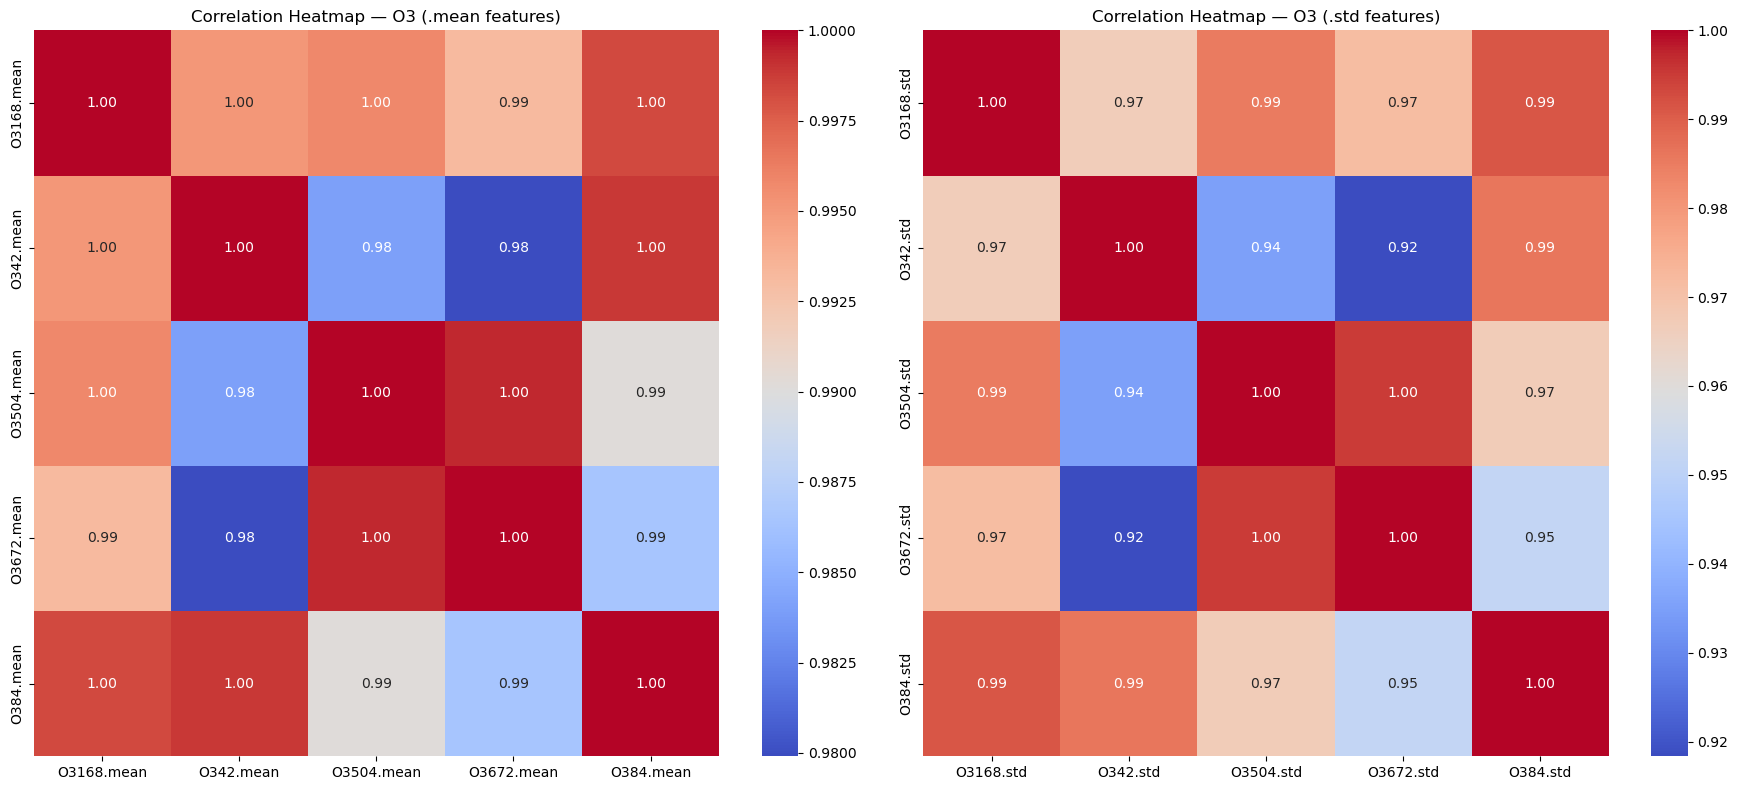

Mean correlation for each variable
O3168.mean    0.996476
O384.mean     0.994767
O3504.mean    0.993869
O3672.mean    0.991767
O342.mean     0.991593
dtype: float64


In [12]:
o3_cols = [c for c in df_x.columns if c.startswith("O3")]
o3_mean_cols = [c for c in o3_cols if c.endswith(".mean")]
o3_std_cols = [c for c in o3_cols if c.endswith(".std")]

corr_mean = df_x[o3_mean_cols].corr()
corr_std = df_x[o3_std_cols].corr()

print(corr_mean)
print(corr_std)

mean_corr_order = corr_mean.mean().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # 1 row, 2 columns

# --- Left plot: O3 mean ---
sns.heatmap(corr_mean, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0])
axes[0].set_title("Correlation Heatmap — O3 (.mean features)")

# --- Right plot: O3 std ---
sns.heatmap(corr_std, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1])
axes[1].set_title("Correlation Heatmap — O3 (.std features)")

plt.tight_layout()
plt.show()

print('Mean correlation for each variable')
print(mean_corr_order)

                RHIRGA168.mean  RHIRGA336.mean  RHIRGA42.mean  RHIRGA504.mean  \
RHIRGA168.mean        1.000000        0.999223       0.997591        0.998325   
RHIRGA336.mean        0.999223        1.000000       0.995180        0.999451   
RHIRGA42.mean         0.997591        0.995180       1.000000        0.993646   
RHIRGA504.mean        0.998325        0.999451       0.993646        1.000000   
RHIRGA672.mean        0.996497        0.997779       0.991387        0.998902   
RHIRGA84.mean         0.998889        0.996962       0.999542        0.995592   

                RHIRGA672.mean  RHIRGA84.mean  
RHIRGA168.mean        0.996497       0.998889  
RHIRGA336.mean        0.997779       0.996962  
RHIRGA42.mean         0.991387       0.999542  
RHIRGA504.mean        0.998902       0.995592  
RHIRGA672.mean        1.000000       0.993430  
RHIRGA84.mean         0.993430       1.000000  
               RHIRGA168.std  RHIRGA336.std  RHIRGA42.std  RHIRGA504.std  \
RHIRGA168.std       

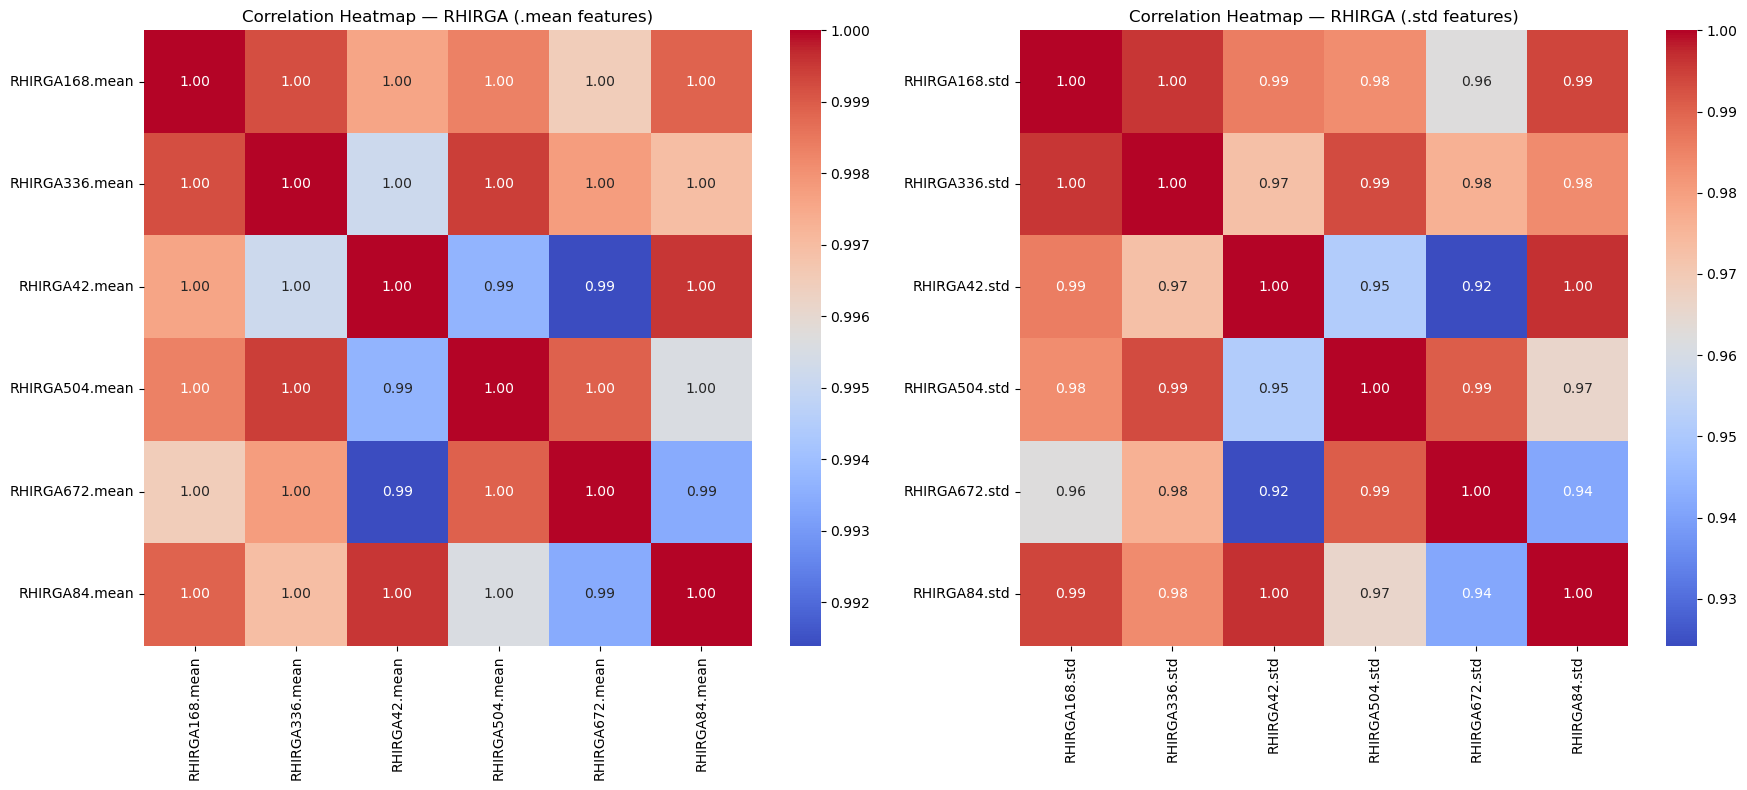

Mean correlation for each variable
RHIRGA168.mean    0.998421
RHIRGA336.mean    0.998099
RHIRGA504.mean    0.997653
RHIRGA84.mean     0.997402
RHIRGA672.mean    0.996333
RHIRGA42.mean     0.996225
dtype: float64


In [13]:
RHIRGA_cols = [c for c in df_x.columns if c.startswith("RHIRGA")]
RHIRGA_mean_cols = [c for c in RHIRGA_cols if c.endswith(".mean")]
RHIRGA_std_cols = [c for c in RHIRGA_cols if c.endswith(".std")]

corr_mean = df_x[RHIRGA_mean_cols].corr()
corr_std = df_x[RHIRGA_std_cols].corr()

print(corr_mean)
print(corr_std)

mean_corr_order = corr_mean.mean().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # 1 row, 2 columns

# --- Left plot: O3 mean ---
sns.heatmap(corr_mean, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0])
axes[0].set_title("Correlation Heatmap — RHIRGA (.mean features)")

# --- Right plot: O3 std ---
sns.heatmap(corr_std, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1])
axes[1].set_title("Correlation Heatmap — RHIRGA (.std features)")

plt.tight_layout()
plt.show()

print('Mean correlation for each variable')
print(mean_corr_order)


           T168.mean  T42.mean  T504.mean  T672.mean  T84.mean
T168.mean   1.000000  0.999808   0.999657   0.999087  0.999921
T42.mean    0.999808  1.000000   0.999254   0.998550  0.999945
T504.mean   0.999657  0.999254   1.000000   0.999802  0.999422
T672.mean   0.999087  0.998550   0.999802   1.000000  0.998765
T84.mean    0.999921  0.999945   0.999422   0.998765  1.000000
          T168.std   T42.std  T504.std  T672.std   T84.std
T168.std  1.000000  0.988589  0.990680  0.974052  0.994891
T42.std   0.988589  1.000000  0.967277  0.947833  0.997834
T504.std  0.990680  0.967277  1.000000  0.993370  0.977289
T672.std  0.974052  0.947833  0.993370  1.000000  0.958624
T84.std   0.994891  0.997834  0.977289  0.958624  1.000000


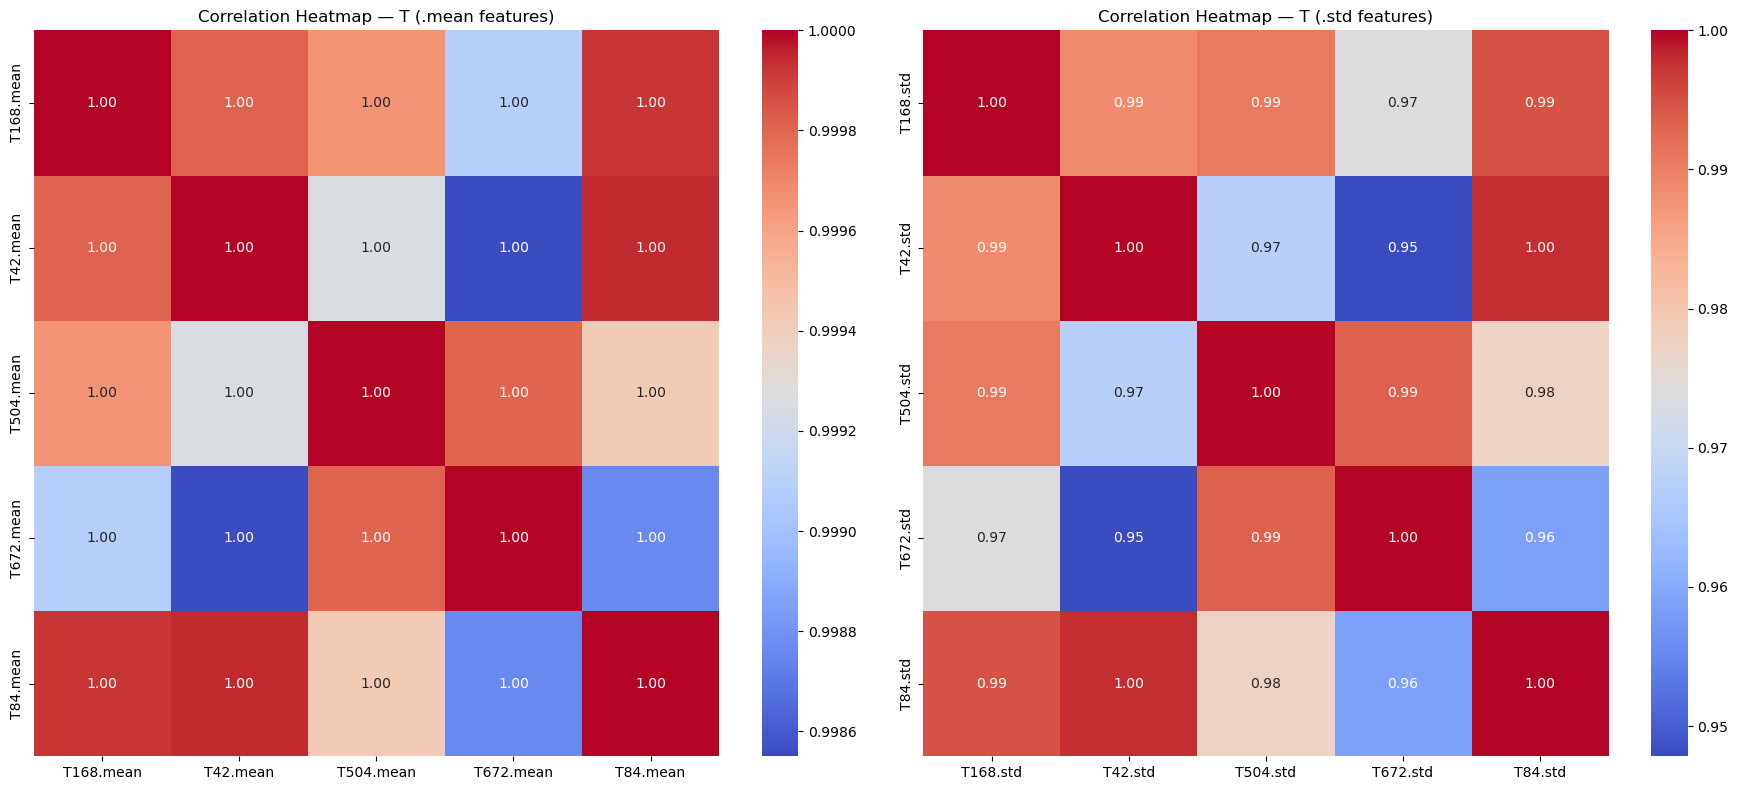

Mean correlation for each variable
T168.mean    0.999695
T504.mean    0.999627
T84.mean     0.999611
T42.mean     0.999512
T672.mean    0.999241
dtype: float64


In [14]:
temp_cols = [c for c in df_x.columns if c.startswith("T")]
temp_mean_cols = [c for c in temp_cols if c.endswith(".mean")]
temp_std_cols = [c for c in temp_cols if c.endswith(".std")]

corr_mean = df_x[temp_mean_cols].corr()
corr_std = df_x[temp_std_cols].corr()

print(corr_mean)
print(corr_std)

mean_corr_order = corr_mean.mean().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # 1 row, 2 columns

# --- Left plot: T mean ---
sns.heatmap(corr_mean, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0])
axes[0].set_title("Correlation Heatmap — T (.mean features)")

# --- Right plot: T std ---
sns.heatmap(corr_std, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1])
axes[1].set_title("Correlation Heatmap — T (.std features)")

plt.tight_layout()
plt.show()

print('Mean correlation for each variable')
print(mean_corr_order)

For the same physical quantitiy, the observations at different heights are extremely highly correlated in both mean and std.

So, I suggest we can keep the height with the highest mean value among those with highly correlated coefficients.

For example,

in temperature, we sum up the correlation coefficients of each row of the correlation matrix and calculate the mean, which derives T168.mean having the largest mean. Thus, we can keep T168.mean and T168.std to represent the temperature.

So, for those with multiple heights, we can keep CO2168, H2O168, NO504, NOx335, O3168, RHIRGA168, T168

                CO2168.mean  Glob.mean  NET.mean  NO504.mean  O3168.mean  \
CO2168.mean        1.000000  -0.422862 -0.422650    0.316320   -0.265492   
Glob.mean         -0.422862   1.000000  0.958582   -0.204867    0.637383   
NET.mean          -0.422650   0.958582  1.000000   -0.218948    0.601172   
NO504.mean         0.316320  -0.204867 -0.218948    1.000000   -0.326529   
O3168.mean        -0.265492   0.637383  0.601172   -0.326529    1.000000   
Pamb0.mean        -0.055435   0.335392  0.312931    0.052339    0.089168   
PAR.mean          -0.416232   0.995727  0.968057   -0.208927    0.631601   
PTG.mean           0.098455  -0.278143 -0.335288    0.128316   -0.215335   
RGlob.mean        -0.255459   0.841892  0.741876   -0.048529    0.557629   
RHIRGA168.mean     0.386704  -0.906972 -0.889376    0.235616   -0.655975   
RPAR.mean          0.071932   0.438492  0.315150    0.146578    0.366402   
SO2168.mean        0.313204  -0.115704 -0.152259    0.366177    0.018293   
SWS.mean    

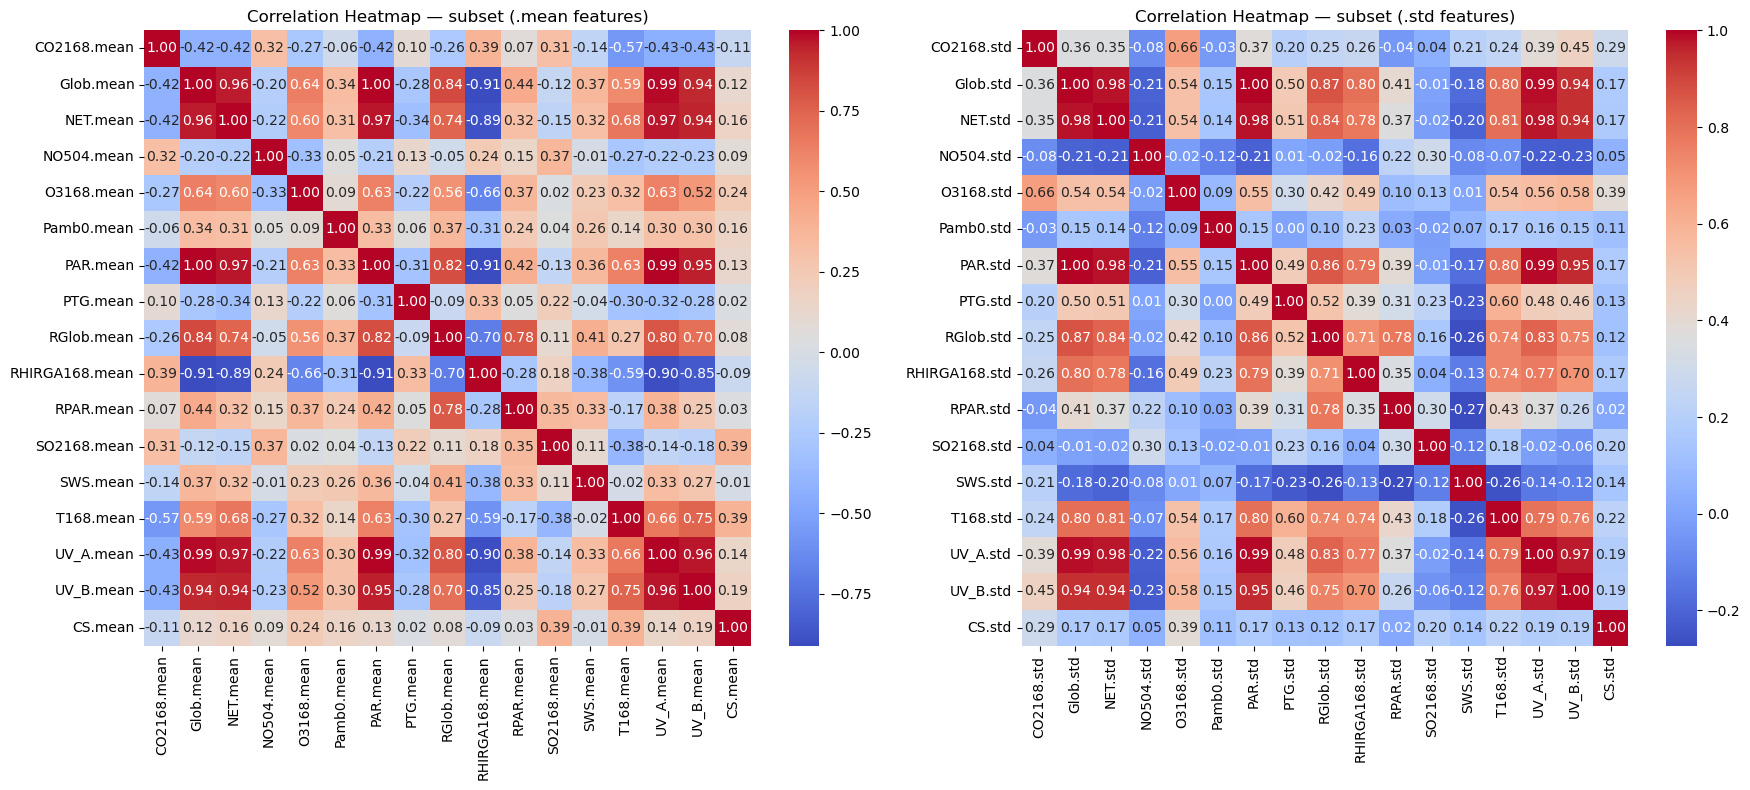

In [15]:
#start = ['CO2','Glob','H20','NET','NO','NOx','O3','Pamb0','PAR','PTG','RGlob','RHIRGA','RPAR','SO2','SWS','T','UV_A','UV_B','CS']
start_sub = ['CO2168','Glob','H20168','NET','NO504','NOx335','O3168','Pamb0','PAR','PTG','RGlob','RHIRGA168','RPAR','SO2','SWS','T168','UV_A','UV_B','CS']

sub_cols = [c for c in df_x.columns if c.startswith(tuple(start_sub))]
sub_mean_cols = [c for c in sub_cols if c.endswith(".mean")]
sub_std_cols = [c for c in sub_cols if c.endswith(".std")]

corr_mean = df_x[sub_mean_cols].corr()
corr_std = df_x[sub_std_cols].corr()

print(corr_mean)
print(corr_std)

mean_corr_order = corr_mean.mean().sort_values(ascending=False)

print('Mean correlation for each variable')
print(mean_corr_order)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # 1 row, 2 columns

# --- Left plot: T mean ---
sns.heatmap(corr_mean, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0])
axes[0].set_title("Correlation Heatmap — subset (.mean features)")

# --- Right plot: T std ---
sns.heatmap(corr_std, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1])
axes[1].set_title("Correlation Heatmap — subset (.std features)")

plt.tight_layout()
plt.show()



several features are super high correlated.

Only compare NAME.mean

(>0.85)
positive correlated:

Glob + NET; Glob + PAR;,Glob + UV_A; Glob + UV_B;

NET + PAR; NET + UV_A; NET + UV_B；

PAR + UV_A; PAR + UV_B

UV_A + UV_B

negative correlated
Glob + RHIRGA168;

Net + RHIRGA168;

PAR + RHIRGA168;

RHIRGA168 + UV_A; RHIRGA168 + UV_B

So, Glob, NET, PAR, UV_A, UV_B, RHIRGA168 are highly correlated in pairs.


In [16]:
start_high_corr = ['Glob','NET','PAR','RHIRGA168','UV_A','UV_B']

high_corr_cols = [c for c in df_x.columns if c.startswith(tuple(start_high_corr))]
sub_mean_cols = [c for c in high_corr_cols if c.endswith(".mean")]
sub_std_cols = [c for c in high_corr_cols if c.endswith(".std")]

corr_mean = df_x[sub_mean_cols].corr()
corr_std = df_x[sub_std_cols].corr()

print(corr_mean)

abs_corr_mean = corr_mean.abs()          
mean_corr_order = abs_corr_mean.mean().sort_values(ascending=False)
print('Mean correlation for each variable')
print(mean_corr_order)

                Glob.mean  NET.mean  PAR.mean  RHIRGA168.mean  UV_A.mean  \
Glob.mean        1.000000  0.958582  0.995727       -0.906972   0.985450   
NET.mean         0.958582  1.000000  0.968057       -0.889376   0.968309   
PAR.mean         0.995727  0.968057  1.000000       -0.912078   0.993120   
RHIRGA168.mean  -0.906972 -0.889376 -0.912078        1.000000  -0.897537   
UV_A.mean        0.985450  0.968309  0.993120       -0.897537   1.000000   
UV_B.mean        0.935493  0.944963  0.951705       -0.851695   0.964597   

                UV_B.mean  
Glob.mean        0.935493  
NET.mean         0.944963  
PAR.mean         0.951705  
RHIRGA168.mean  -0.851695  
UV_A.mean        0.964597  
UV_B.mean        1.000000  
Mean correlation for each variable
PAR.mean          0.970114
UV_A.mean         0.968169
Glob.mean         0.963704
NET.mean          0.954881
UV_B.mean         0.941409
RHIRGA168.mean    0.909610
dtype: float64


I keep PAR and delete Glob, NET, UV_A, UV_B, RHIRGA168 in the VIF analysis for convinience.

But we can keep them all in the model fitting.

Also, for some features, NAME.mean and NAME.std could be highly correlated. (below)

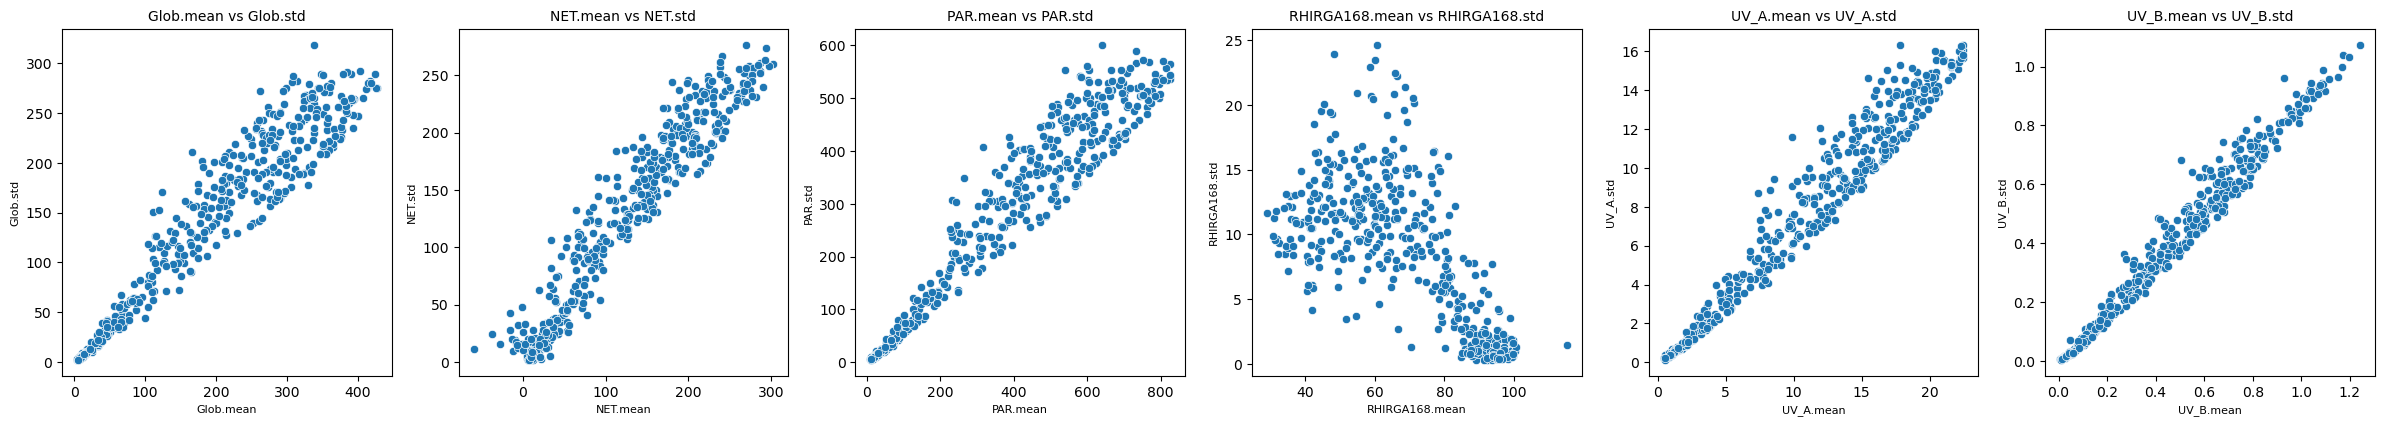

In [17]:
n = len(sub_mean_cols)

# Create 3 x 6 grid (adjust if n < 18)
fig, axes = plt.subplots(3, 6, figsize=(24, 12))
axes = axes.flatten()  # make indexing easier

idx = 0
for mean_col, std_col in zip(sub_mean_cols, sub_std_cols):
    
    if mean_col in df_x.columns and std_col in df_x.columns:
        
        ax = axes[idx]
        sns.scatterplot(data=df_x, x=mean_col, y=std_col, ax=ax)
        ax.set_title(f"{mean_col} vs {std_col}", fontsize=10)
        ax.set_xlabel(mean_col, fontsize=8)
        ax.set_ylabel(std_col, fontsize=8)
        
        idx += 1

# Remove unused subplots if fewer than 18
for j in range(idx, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

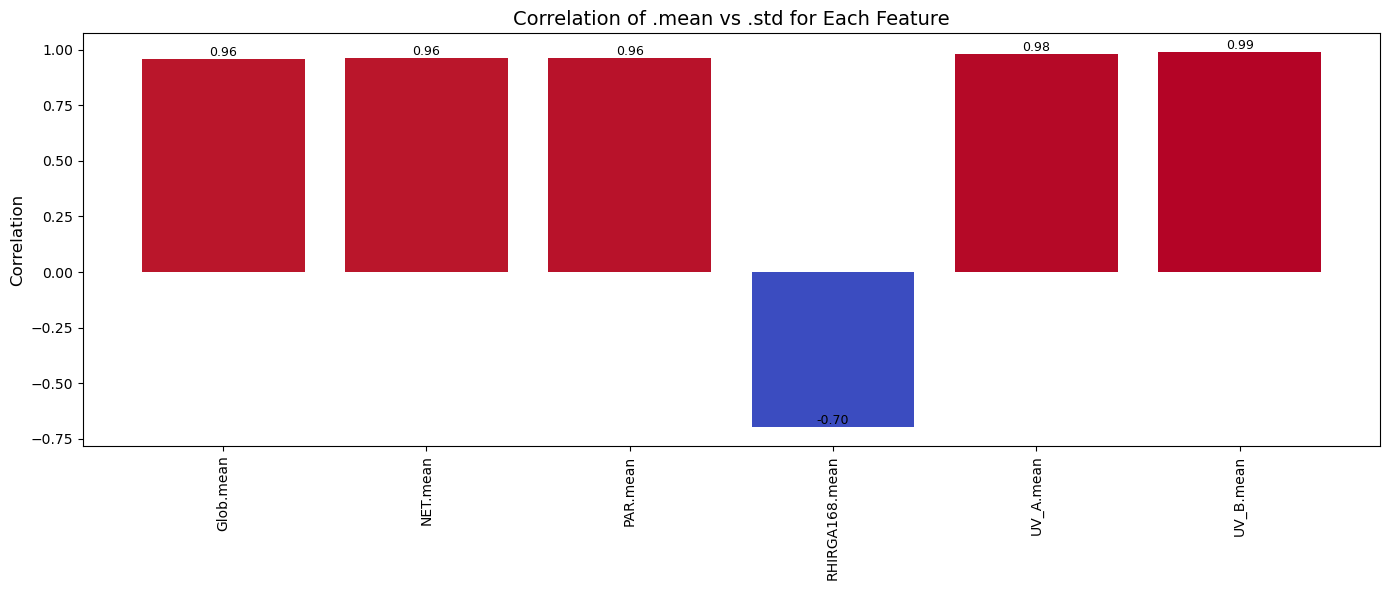

In [18]:
# Compute correlations
corr_values = {}
for mean_col, std_col in zip(sub_mean_cols, sub_std_cols):
    if mean_col in df_x.columns and std_col in df_x.columns:
        corr_values[mean_col] = df_x[[mean_col, std_col]].corr().iloc[0,1]

corr_df = pd.DataFrame.from_dict(corr_values, orient='index', columns=['corr'])

# Normalize correlation values to [0,1] so we can map colors
norm = (corr_df['corr'] - corr_df['corr'].min()) / (corr_df['corr'].max() - corr_df['corr'].min())

# Choose heatmap colormap
cmap = plt.cm.coolwarm  # same as heatmap
colors = cmap(norm)     # map normalized values to colors

# Plot barplot
plt.figure(figsize=(14, 6))
bars = plt.bar(corr_df.index, corr_df['corr'], color=colors)

# Rotate labels
plt.xticks(rotation=90)
plt.title("Correlation of .mean vs .std for Each Feature", fontsize=14)
plt.ylabel("Correlation", fontsize=12)

# Add value labels
for bar, value in zip(bars, corr_df['corr']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f"{value:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


So in Glob, NET, PAR, RGlob, RPAR, UV_A, UV_B and SWS, .mean and .std have really high corr. But almost all of them have high corr

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

short_sub = ['CO2168','H20168''NO504','NOx335','O3168','Pamb0','PAR','PTG','RGlob','RPAR','SO2','SWS','T168','CS']

sub_cols = [c for c in df_x.columns if c.startswith(tuple(short_sub))]
to_drop = ['PAR.std', 'RGlob.std', 'SWS.std']

sub_cols = [c for c in sub_cols if c not in to_drop]

X = df_x[sub_cols].dropna()

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df)

        feature          VIF
0   CO2168.mean  1816.250932
1    CO2168.std     6.059070
2    O3168.mean    31.413278
3     O3168.std     9.203781
4    Pamb0.mean  3059.267428
5     Pamb0.std     3.039940
6      PAR.mean    45.621915
7      PTG.mean     2.277280
8       PTG.std    10.610731
9    RGlob.mean    47.516435
10    RPAR.mean    58.447528
11     RPAR.std    42.753994
12  SO2168.mean     4.697767
13   SO2168.std     5.031423
14     SWS.mean  1006.942869
15    T168.mean    11.964397
16     T168.std    18.648318
17      CS.mean     9.644507
18       CS.std     3.258858


In [20]:
short_sub = ['CO2168','H20168''NO504','NOx335','O3168','Pamb0','PAR','PTG','RGlob','RPAR','SO2','SWS','T168','CS']

sub_cols = [c for c in df_x.columns if c.startswith(tuple(short_sub))]
to_drop = [c for c in sub_cols if c.endswith(".std")]

sub_cols = [c for c in sub_cols if c not in to_drop]

X = df_x[sub_cols].dropna()

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df)

        feature          VIF
0   CO2168.mean  1761.970387
1    O3168.mean    25.922326
2    Pamb0.mean  2986.341253
3      PAR.mean    36.343460
4      PTG.mean     1.251857
5    RGlob.mean    44.665916
6     RPAR.mean    15.119336
7   SO2168.mean     3.304746
8      SWS.mean   978.375522
9     T168.mean     8.460823
10      CS.mean     7.610952
